# Importing Libaries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [ ]:
df = pd.read_csv('Housing.csv')

In [ ]:
df.head(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,no,yes,2,yes,semi-furnished
7,10150000,16200,5,3,2,yes,no,no,no,no,0,no,unfurnished
8,9870000,8100,4,1,2,yes,yes,yes,no,yes,2,yes,furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [ ]:
df.isnull().sum()

,0
price,0
area,0
bedrooms,0
bathrooms,0
stories,0
mainroad,0
guestroom,0
basement,0
hotwaterheating,0
airconditioning,0


In [ ]:
df.shape

(545, 13)

In [ ]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [ ]:
df.dtypes

,0
price,int64
area,int64
bedrooms,int64
bathrooms,int64
stories,int64
mainroad,object
guestroom,object
basement,object
hotwaterheating,object
airconditioning,object


In [ ]:
df.duplicated().sum()

np.int64(0)

No duplicates, no null values in the data, thus, dataset is clean.

In [ ]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

# Exploratory Data Analysis

array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'area'}>],
       [<Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>],
       [<Axes: title={'center': 'stories'}>,
        <Axes: title={'center': 'parking'}>]], dtype=object)

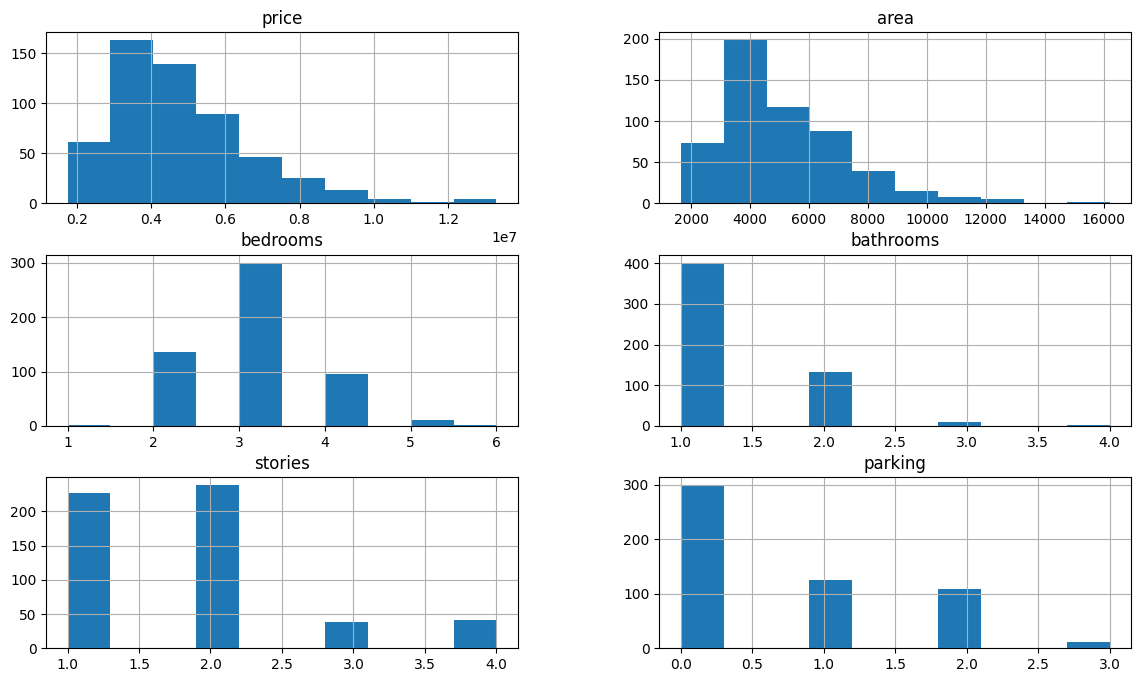

In [ ]:
df.hist(figsize=(14,8))

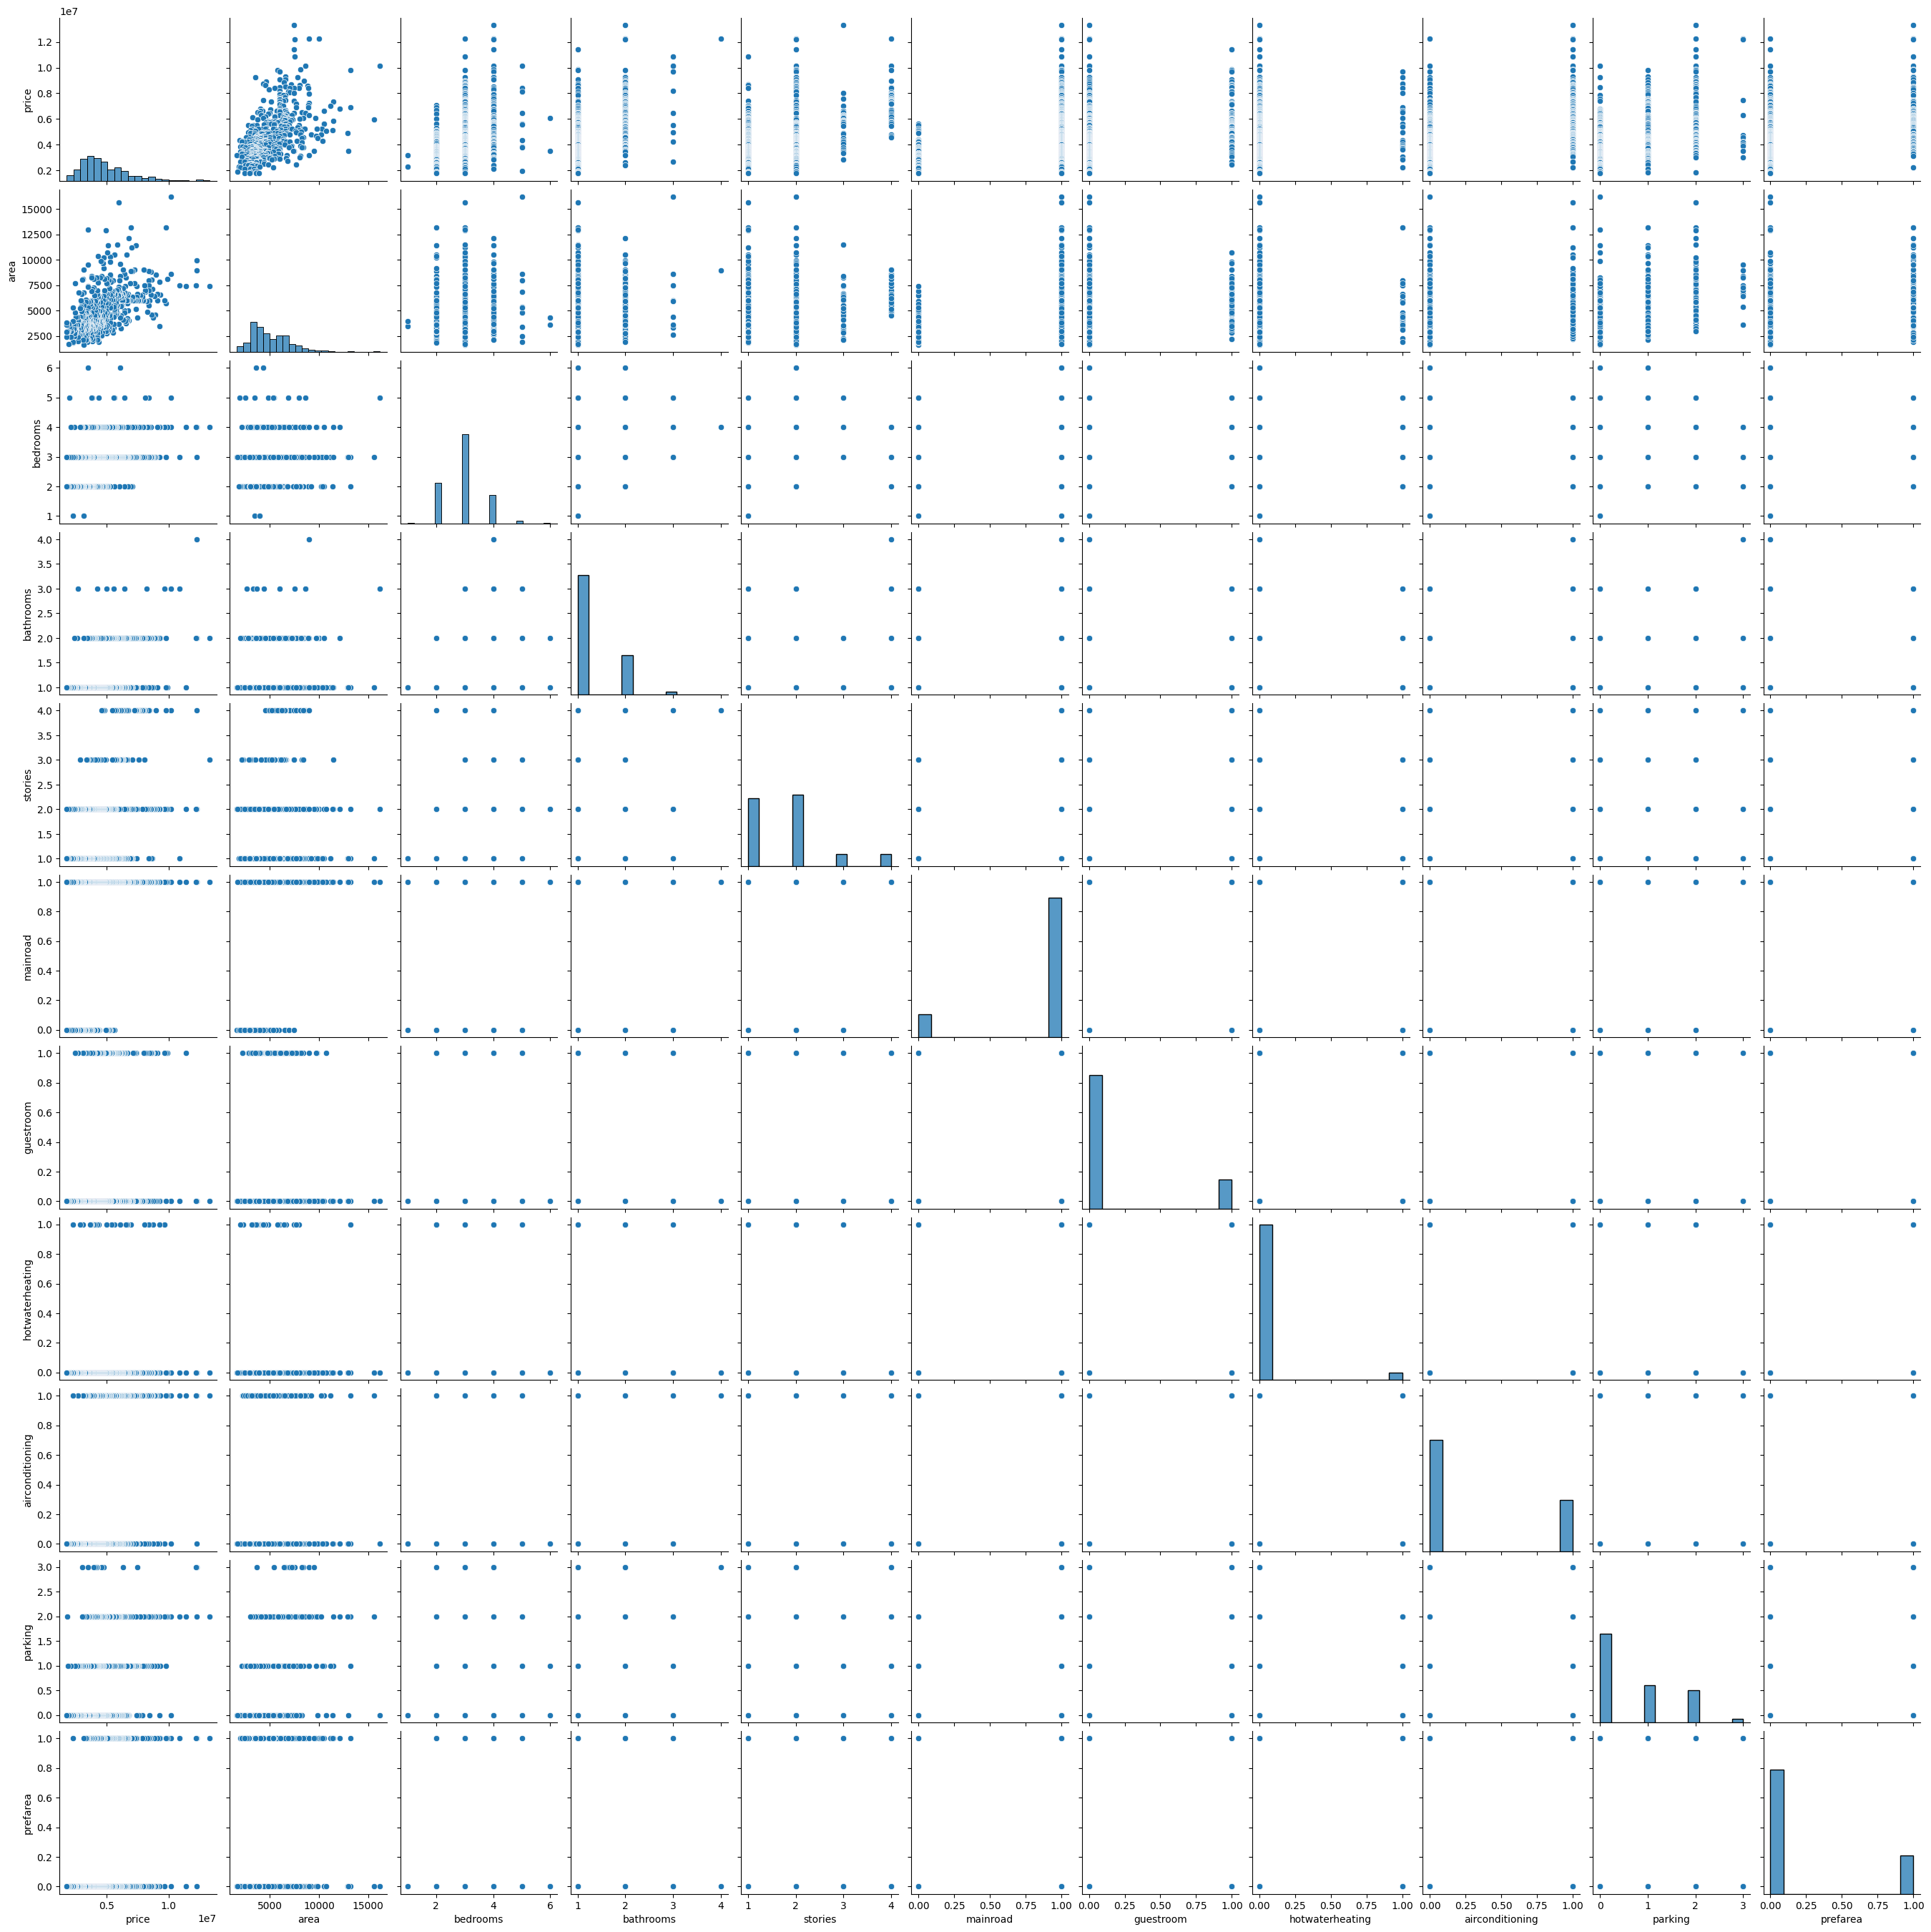

In [ ]:
sns.pairplot(df)

Text(0, 0.5, 'Mean Price')

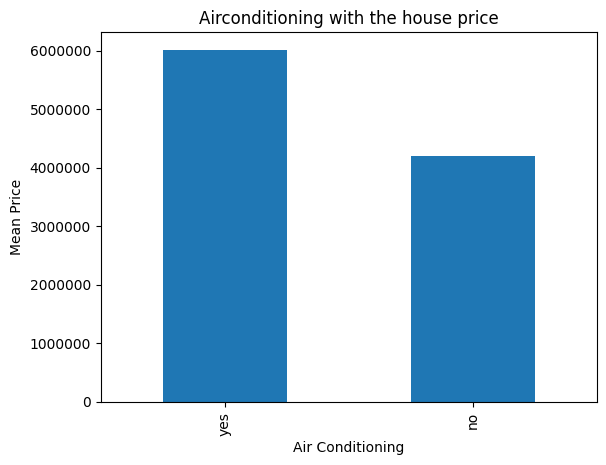

In [ ]:
plt.ticklabel_format(style='plain', axis='y')
df.groupby("airconditioning")['price'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title('Airconditioning with the house price')
plt.xlabel('Air Conditioning')
plt.ylabel('Mean Price')

In [ ]:
# lets convert the list of string columns with binary numbers
h_list = ['mainroad','guestroom','basement','hotwaterheating','airconditioning', 'prefarea']
df[h_list] = df[h_list].apply(lambda x: x.map({'yes':1,'no':0}))

In [ ]:
df[h_list].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [ ]:
# get the dummy variable
status = pd.get_dummies(df['furnishingstatus'], dtype= int)

In [ ]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished


In [ ]:
status = pd.get_dummies(df['furnishingstatus'],dtype=int, drop_first = True)

In [ ]:
df = pd.concat([df, status], axis =1 )

In [ ]:
df.drop(['furnishingstatus'], axis=1, inplace=True)

In [ ]:
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [ ]:
status.head(5)

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [ ]:
# Spitting data into Trainning and Testing Data Separately
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test = train_test_split(df,train_size = 0.7,test_size= 0.3, random_state= 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply scaler to all the columns except the "yes and no" and dummy variables
vars = ['area','bedrooms','bathrooms','stories','parking','price']
df_train[vars] = scaler.fit_transform(df_train[vars])

In [ ]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [ ]:
df_train.agg(['count','mean','median','std','max','min'])

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
median,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_train.corr()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
price,1.000000,0.532025,0.349825,0.524246,0.409464,0.319208,0.265877,0.200743,0.141202,0.433162,0.352081,0.344543,0.078917,-0.270114
area,0.532025,1.000000,0.097462,0.163446,0.069274,0.308272,0.155665,0.106971,0.037719,0.215888,0.365658,0.279878,-0.040753,-0.131524
bedrooms,0.349825,0.097462,1.000000,0.346925,0.419582,0.012655,0.089488,0.120618,0.085818,0.161890,0.120363,0.076503,0.049111,-0.125921
bathrooms,0.524246,0.163446,0.346925,1.000000,0.295689,0.031716,0.150982,0.120857,0.112732,0.228315,0.138241,0.061584,0.065987,-0.128192
stories,0.409464,0.069274,0.419582,0.295689,1.000000,0.129427,0.068088,-0.155313,-0.001538,0.279779,0.009708,0.072192,-0.001883,-0.088199
mainroad,0.319208,0.308272,0.012655,0.031716,0.129427,1.000000,0.106875,0.067937,-0.003779,0.056375,0.200389,0.191465,0.012254,-0.129101
guestroom,0.265877,0.155665,0.089488,0.150982,0.068088,0.106875,1.000000,0.367345,0.018394,0.130300,-0.010240,0.161877,0.000632,-0.017198
basement,0.200743,0.106971,0.120618,0.120857,-0.155313,0.067937,0.367345,1.000000,0.023806,0.082892,0.042203,0.203933,0.049430,-0.077562
hotwaterheating,0.141202,0.037719,0.085818,0.112732,-0.001538,-0.003779,0.018394,0.023806,1.000000,-0.153801,0.074999,-0.074318,0.064641,-0.063025
airconditioning,0.433162,0.215888,0.161890,0.228315,0.279779,0.056375,0.130300,0.082892,-0.153801,1.000000,0.188132,0.099840,-0.026475,-0.123584


<Axes: >

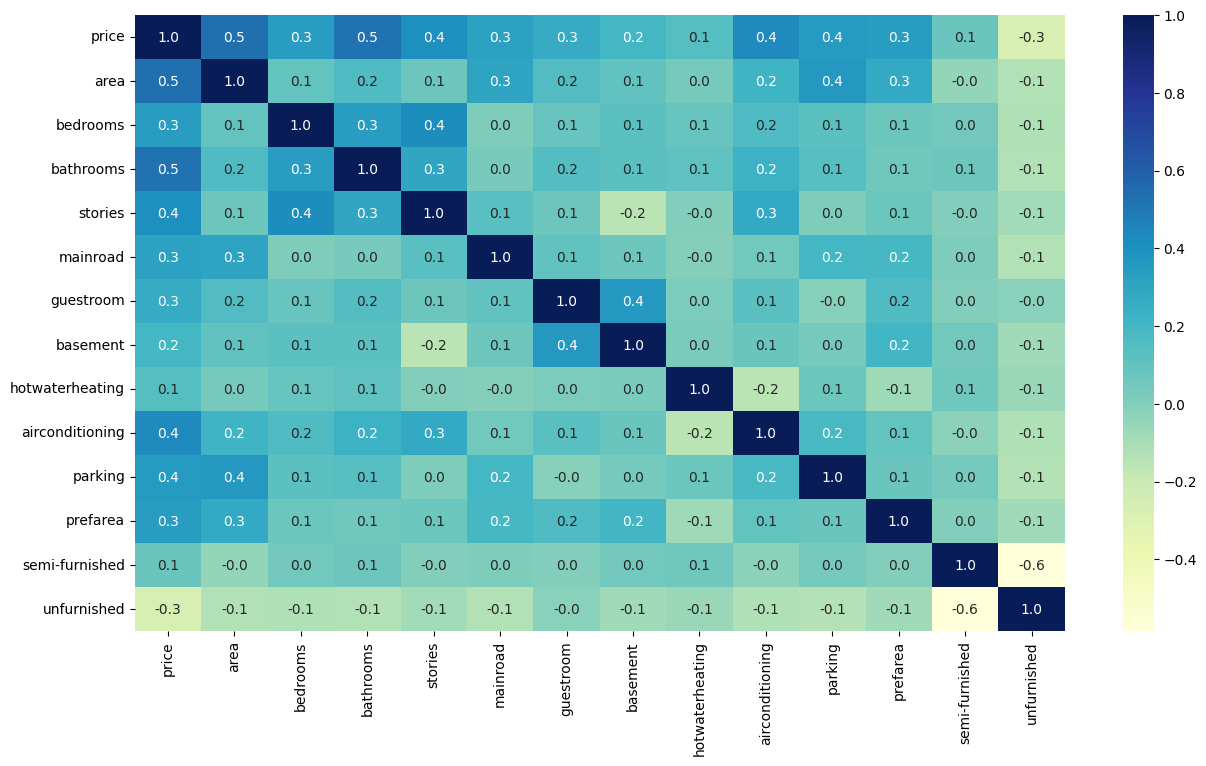

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_train.corr(),annot= True, fmt=".1f", cmap='YlGnBu')

In [ ]:
# Setting target and features
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
# Importing RFE(Recursive Feature Elimination) and LR(linear Regression)
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [ ]:
rfe = RFE(estimator=lm, step=6)
rfe = rfe.fit(X_train,y_train)

In [ ]:
feature_ranks = [
    (col, bool(support),int(rank))
    for col, support,rank in zip(X_train.columns,rfe.support_,rfe.ranking_)
]
feature_ranks

[('area', True, 1),
 ('bedrooms', False, 3),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', False, 3),
 ('guestroom', False, 3),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', False, 2),
 ('prefarea', True, 1),
 ('semi-furnished', False, 3),
 ('unfurnished', False, 3)]

In [ ]:
col = X_train.columns[rfe.support_]
col

Index(['area', 'bathrooms', 'stories', 'hotwaterheating', 'airconditioning',
       'prefarea'],
      dtype='object')

In [ ]:
X_train_rfe = X_train[col]

In [ ]:
# Building model using statsmodel, for detailed statistics
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
# Running Linear Model
lm= sm.OLS(y_train,X_train_rfe).fit()

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.625
Method:                 Least Squares   F-statistic:                     106.7
Date:                Sat, 14 Jun 2025   Prob (F-statistic):           6.98e-78
Time:                        23:54:22   Log-Likelihood:                 353.86
No. Observations:                 381   AIC:                            -693.7
Df Residuals:                     374   BIC:                            -666.1
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0659      0.010     

In [ ]:
# Calculate VIF for the regression analysis
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = X_train_rfe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by= 'VIF', ascending= False)
vif

,Features,VIF
0,const,4.24
5,airconditioning,1.20
2,bathrooms,1.16
3,stories,1.16
1,area,1.15
6,prefarea,1.10
4,hotwaterheating,1.06


In [ ]:
X_train_rfe.columns

Index(['const', 'area', 'bathrooms', 'stories', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [ ]:
# Using trained linear regression model(lm) to make prediction with y_train_price
y_train_price = lm.predict(X_train_rfe)

In [ ]:
X_train_rfe.columns

Index(['const', 'area', 'bathrooms', 'stories', 'hotwaterheating',
       'airconditioning', 'prefarea'],
      dtype='object')

In [ ]:
X_train_rfe.head()

,const,area,bathrooms,stories,hotwaterheating,airconditioning,prefarea
359,1.0,0.155227,0.0,0.000000,0,0,0
19,1.0,0.403379,0.5,0.333333,0,1,1
159,1.0,0.115628,0.5,0.000000,0,1,0
35,1.0,0.454417,0.5,1.000000,0,1,0
28,1.0,0.538015,0.5,0.333333,1,0,0


In [ ]:
res = (y_train_price - y_train)

Text(0, 0.5, 'Counts')

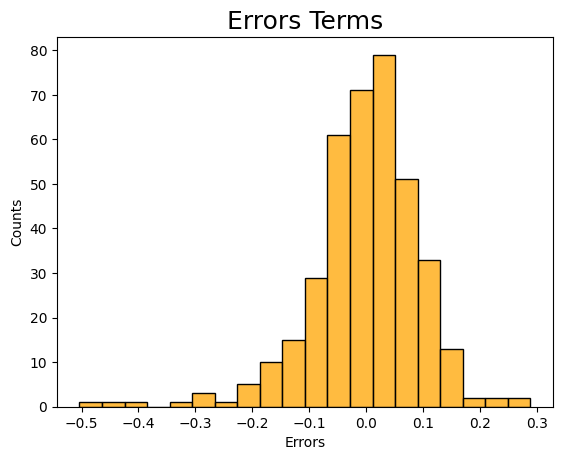

In [ ]:
fig = plt.figure()
sns.histplot((y_train_price - y_train), bins = 20, color= 'orange')
plt.title('Errors Terms', fontsize= 18)
plt.xlabel('Errors')
plt.ylabel('Counts')

Text(0.5, 1.0, 'Prices')

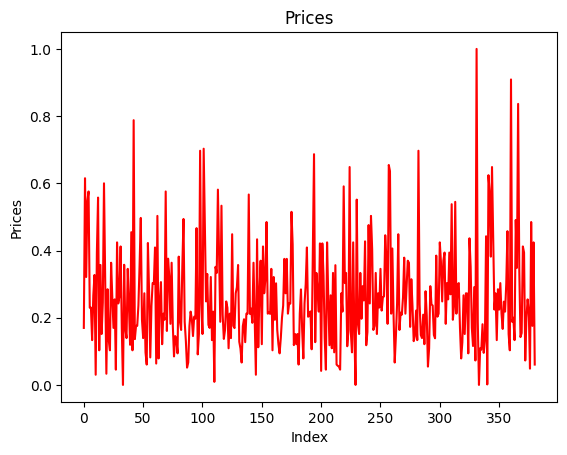

In [ ]:
plot_df = pd.DataFrame({
    'Index': range(len(y_train)),
    'Prices': y_train.values
})
sns.lineplot(x='Index',y='Prices',data=plot_df, color= 'r')
plt.title('Prices')

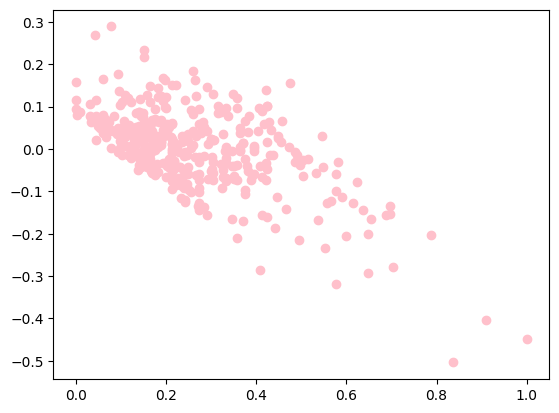

In [ ]:
plt.scatter(y_train,res,color='pink')

In [ ]:
# Model Evaluation and testing
num_vars = ['area','stories','bathrooms','airconditioning','prefarea','parking','price']

In [ ]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

In [ ]:
X_test = sm.add_constant(X_test)

In [ ]:
X_test_rfe = X_test[X_train_rfe.columns]

In [ ]:
y_prediction = lm.predict(X_test_rfe)

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prediction)

0.5350445027578827

Text(0, 0.5, 'y_prediction')

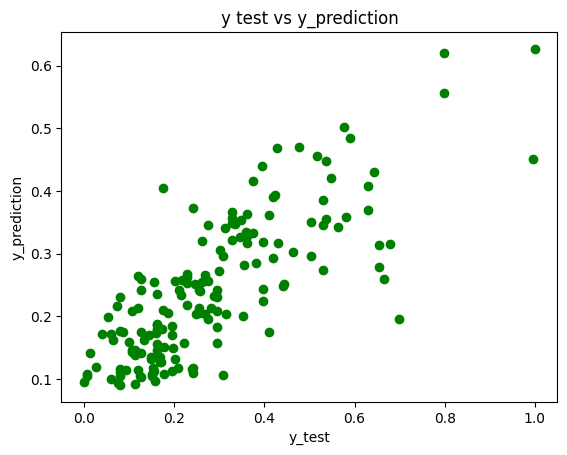

In [ ]:
plt.scatter(y_test,y_prediction, color= 'g')
plt.title("y test vs y_prediction")
plt.xlabel('y_test')
plt.ylabel('y_prediction')